<a href="https://colab.research.google.com/github/MichelaMarini/MATH-6373-PyTorch-tutorial/blob/main/WEEK4_CNN_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Files already downloaded and verified
Files already downloaded and verified


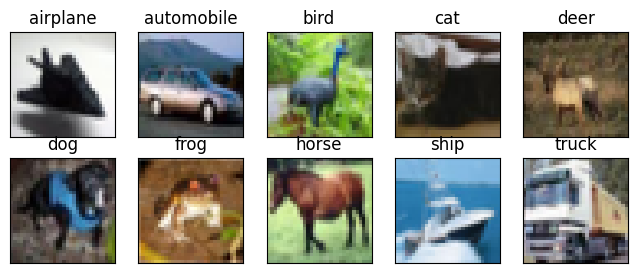

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from torch.utils.data import Subset
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt
import time

# Check if CUDA is available, otherwise, use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Load CIFAR-10 dataset
cifar10  = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
cifar10_val = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img, _ = next((img, label) for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

In [ ]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [ ]:
len(cifar10)

50000

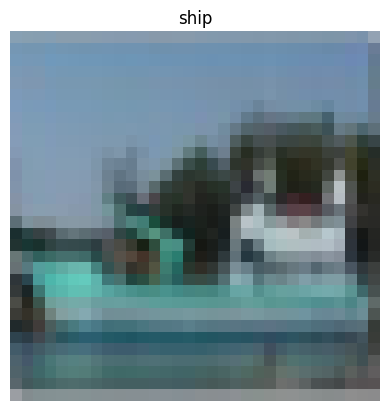

In [ ]:
img, label = cifar10[111]
img, label, class_names[label]

# Display the image
plt.imshow(img)
plt.title(class_names[label])
plt.axis('off')
plt.show()

torch.Size([3, 32, 32]) torch.float32


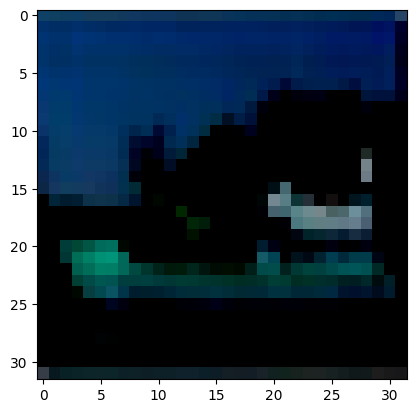

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

tensor_cifar10 = torchvision.datasets.CIFAR10(root='./data', train=True, download=False,
                          transform=transform)

tensor_cifar10_val = torchvision.datasets.CIFAR10(root='./data', train=False, download=False,
                          transform=transform)

img_t, _ = tensor_cifar10[111]  # Retrieve image and label
print(img_t.shape, img_t.dtype)
plt.imshow(img_t.permute(1, 2, 0))  # Permute dimensions for displaying image
plt.show()

In [ ]:
# due to the computational time, we are only taking 2 classes and make it a binary classification problem
label_map = {0: 0, 5: 1}
cifar2 = [(img, label_map[label]) for img, label in tensor_cifar10 if label in [0, 5]]
cifar2_val = [(img, label_map[label]) for img, label in tensor_cifar10_val if label in [0, 5]]

In [ ]:
class CNN(nn.Module):
    # Define the constructor method for the CNN class
    def __init__(self):
        # Call the constructor of the parent class (nn.Module)

        # Define the first convolutional layer with input channels=3, output channels=32, kernel size=3x3, and padding=1

        # Define the second convolutional layer with input channels=32, output channels=64, kernel size=3x3, and padding=1

        # Define the third convolutional layer with input channels=64, output channels=128, kernel size=3x3, and padding=1

        # Define the max pooling layer with kernel size=2x2 and stride=2

        # Define the first fully connected layer with input features=128*4*4 and output features=512

        # Define the second fully connected layer with input features=512 and output features=2 (number of classes)

        # Initialize the ReLU activation function


    # Define the forward method, which describes how data flows through the network
    def forward(self, x):
        # Apply first convolutional layer, followed by ReLU activation and max pooling
        x =
        # print("x1", x.shape)
        # Apply second convolutional layer, followed by ReLU activation and max pooling
        x =
        # print("x2", x.shape)
        # Apply third convolutional layer, followed by ReLU activation and max pooling
        x =
        # print("x3", x.shape)
        # Flatten the output of the convolutional layers
        x = x.view(-1, 128 * 4 * 4)  # Flattening the feature maps into a vector
        # Apply first fully connected layer, followed by ReLU activation
        x =
        # Apply second fully connected layer to obtain the final output
        x =
        return x

# The number of feature maps of the output channels of the convolutional layer is 128.
# The original input image has dimensions H x W (32,32). After three max pooling operations with a kernel size of 2x2 and a stride of 2,
# the dimensions would become H/8 x W/8 (4,4)

# Thus, each of these 128 feature maps has a spatial size of 8x8 after the three max pooling operations.

# So, the shape (batch_size, 128, H/8, W/8) indicates that for each image in the batch, there are 128 feature maps,
# each with a spatial size of 4x4. Therefore, when flattened, we have 128 * 4 * 4 as the input size for the first fully connected layer.

In [ ]:
from torch.utils.data import Dataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class CIFAR2Dataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __getitem__(self, index):
        img, label = self.dataset[index]
        # Assuming the image is already in tensor format
        # Converting label to torch tensor
        return img, torch.tensor(label, dtype=torch.long)

    def __len__(self):
        return len(self.dataset)

# Wrap cifar2 and cifar2_val in the custom Dataset class
train_dataset = CIFAR2Dataset(cifar2)
val_dataset = CIFAR2Dataset(cifar2_val)

batch_size = 64

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader  = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model, loss function, and optimizer
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:

        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

# Evaluation on validation set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on the validation set: {(correct / total) * 100:.2f}%")

Epoch [1/10], Loss: 0.2883
Epoch [2/10], Loss: 0.1696
Epoch [3/10], Loss: 0.1323
Epoch [4/10], Loss: 0.0975
Epoch [5/10], Loss: 0.0812
Epoch [6/10], Loss: 0.0657
Epoch [7/10], Loss: 0.0518
Epoch [8/10], Loss: 0.0411
Epoch [9/10], Loss: 0.0297
Epoch [10/10], Loss: 0.0303
Accuracy on the validation set: 95.20%


Alternative way to define neural networks classes

In [ ]:
class ConvNet(nn.Module):
    # Define the constructor method for the CNN class
    def __init__(self):
      super(ConvNet, self).__init__()
      # First Layer
      self.layer1 = nn.Sequential(
          nn.Conv2d(in_channels=3,out_channels=32,kernel_size=5,stride=1,padding=2),
          nn.BatchNorm2d(32),
          nn.ReLU(),
          nn.MaxPool2d(2,2)
      )
      # Second Layer
      self.layer2 = nn.Sequential(
          nn.Conv2d(in_channels=32,out_channels=64,kernel_size=5,stride=1,padding=2),
          nn.BatchNorm2d(64),
          nn.ReLU(),
          nn.MaxPool2d(2,2)
      )
      # 3 Layer
      self.layer3 = nn.Sequential(
          nn.Conv2d(in_channels=64,out_channels=128,kernel_size=5,stride=1,padding=2),
          nn.BatchNorm2d(128),
          nn.ReLU(),
          nn.MaxPool2d(2,2)
      )
      #Final layer (classification)
      self.classifier = nn.Sequential(
          nn.Linear(128*4*4, 512),
          nn.ReLU(),
          nn.Linear(512,2) # output 2 since binary classification
      )


    # Define the forward method, which describes how data flows through the network
    def forward(self, x):
      out = self.layer1(x)
      out = self.layer2(out)
      out = self.layer3(out)
      out = out.reshape(out.size(0), -1)
      out = self.classifier(out)

      return out

# Problem
Modify the training loop to keep track of the best validation accuracy achieved during training. After each epoch, compare the current validation accuracy with the previously recorded best accuracy. If the current accuracy is higher, update best_accuracy and save the model's state using `torch.save(model.state_dict(), 'best_model.pth')`. This ensures that the best-performing model is saved for later use

In [ ]:
# Initialize the model, loss function, and optimizer
model = ############
criterion = ##########
optimizer = ###########

# Training loop
num_epochs = 10
best_accuracy = 0.0
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:

        inputs, labels =
        ##########
        #########
        #######
        loss = ##########
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    # Evaluation on validation set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = ##########
    print(f"Accuracy on the validation set: {accuracy:.2f}%")

    # Save the model if it has the best accuracy so far
    if #########
      ########
      ########